In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaivalyashah/apple-disease-detection")

print("Path to dataset files:", path)


import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

100%|██████████| 15.6M/15.6M [00:00<00:00, 189MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaivalyashah/apple-disease-detection/versions/1


In [ ]:
# Load training images and preprocessing it..
target = []
train_image = []
flat_data = []

data_directory= '/root/.cache/kagglehub/datasets/kaivalyashah/apple-disease-detection/versions/1/apple_disease_classification/Train'
categories = ['Blotch_Apple', 'Normal_Apple','Rot_Apple','Scab_Apple']

for category in categories:
  class_num=categories.index(category)# label Encoding the values
  path=os.path.join(data_directory, category)# create path to use  all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    #print(img_array.shape)
    #plt.imshow(img_array) # Removed plt.imshow as it can cause issues when processing many images
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    train_image.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
train_image=np.array(train_image)

In [ ]:
len(flat_data[0])

67500

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,

<BarContainer object of 4 artists>

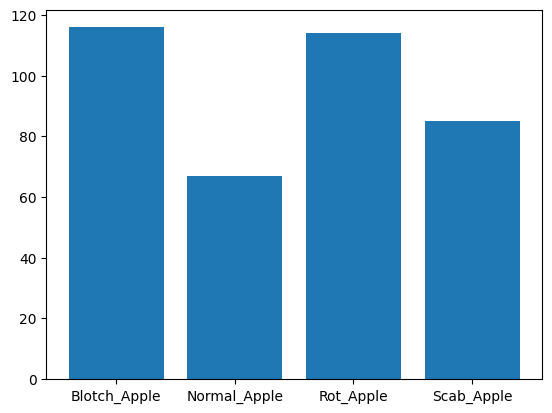

In [ ]:
unique, count = np.unique(target, return_counts=True)
plt.bar(categories, count)

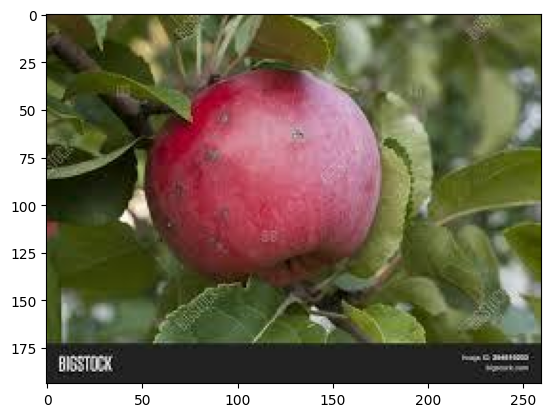

In [ ]:
target = []
test_image = []
flat_data = []

data_directory= '/root/.cache/kagglehub/datasets/kaivalyashah/apple-disease-detection/versions/1/apple_disease_classification/Test'
categories = ['Blotch_Apple', 'Normal_Apple','Rot_Apple','Scab_Apple']

for category in categories:
  class_num=categories.index(category)
  path=os.path.join(data_directory, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    #print(img_array.shape)
    plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    test_image.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
test_image=np.array(test_image)

In [ ]:
feature = np.ndarray(shape = (len(train_image), 150,150 ,3),
                     dtype = np.float32)

for i in range(len(train_image)):
    feature[i] = train_image[i]

feature = feature / 255

In [ ]:
feature

array([[[[2.06525694e-03, 2.06525694e-03, 2.03449954e-03],
         [2.06525694e-03, 2.06525694e-03, 2.03449954e-03],
         [2.06525694e-03, 2.06525694e-03, 2.03449954e-03],
         ...,
         [2.03524088e-03, 2.06599827e-03, 2.05049734e-03],
         [2.04672571e-03, 2.07748311e-03, 2.03466183e-03],
         [2.04536738e-03, 2.07612477e-03, 2.02998868e-03]],

        [[2.10503652e-03, 2.10503652e-03, 2.07427912e-03],
         [2.10503652e-03, 2.10503652e-03, 2.07427912e-03],
         [2.10503652e-03, 2.10503652e-03, 2.07427912e-03],
         ...,
         [2.02573487e-03, 2.05649226e-03, 2.04099133e-03],
         [2.04460789e-03, 2.07536528e-03, 2.03254377e-03],
         [2.04954180e-03, 2.08029943e-03, 2.03416310e-03]],

        [[2.14481610e-03, 2.14481610e-03, 2.11405871e-03],
         [2.14481610e-03, 2.14481610e-03, 2.11405871e-03],
         [2.14481610e-03, 2.14481610e-03, 2.11405871e-03],
         ...,
         [1.99711323e-03, 2.02787062e-03, 2.01236969e-03],
         [

In [ ]:
x_test = np.ndarray(shape = (len(test_image), 150, 150, 3),
                    dtype = np.float32)

for i in range(len(test_image)):
    x_test[i] = test_image[i]

x_test = x_test / 255

In [ ]:
#splitting data into train and test

from sklearn.model_selection import train_test_split
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize

# Reload training data to ensure flat_data and target are correct
target = []
train_image = []
flat_data = []

data_directory= '/root/.cache/kagglehub/datasets/kaivalyashah/apple-disease-detection/versions/1/apple_disease_classification/Train'
categories = ['Blotch_Apple', 'Normal_Apple','Rot_Apple','Scab_Apple']

for category in categories:
  class_num=categories.index(category)# label Encoding the values
  path=os.path.join(data_directory, category)# create path to use  all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    train_image.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
train_image=np.array(train_image)


x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.20, random_state=90)

In [ ]:
from sklearn.preprocessing import StandardScaler #It normalises
sc = StandardScaler()
x_train = sc.fit_transform(x_train)#fit() method is used while working with model to calculate parameters/weights on the training data while predict()
#method uses these parameters/weights on the test data to predict the output.
x_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_predicting = nvclassifier.predict(x_test)
print(y_predicting)

[2 2 0 3 2 0 2 1 1 0 0 2 0 3 2 1 0 0 0 1 2 2 0 0]


In [ ]:
#we can check accuracy of naive bayes usong confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicting)
print(cm)

[[4 1 0 0]
 [3 2 0 0]
 [1 0 8 0]
 [2 1 0 2]]


In [ ]:
a = cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row==c:
            corrPred+= cm[row,c]

        else:
            falsePred = cm[row,c]

print("correct prediction: ",corrPred)
print("False prediction: ",falsePred)
print("\n\n Accuracy of the naive bayes classification is  ",corrPred/(cm.sum()))

correct prediction:  16
False prediction:  0


 Accuracy of the naive bayes classification is   0.6666666666666666


(320, 308, 3)
Predicted Output : Normal_Apple


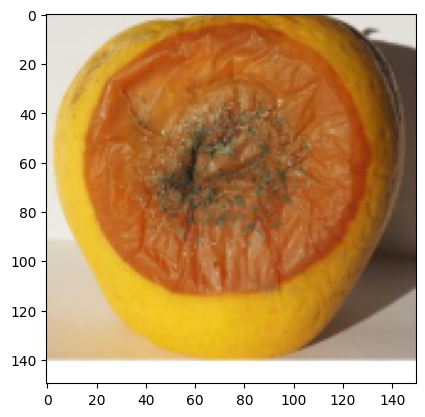

In [ ]:
flat_data = []
url = str("/root/.cache/kagglehub/datasets/kaivalyashah/apple-disease-detection/versions/1/apple_disease_classification/Test/Rot_Apple/2apbkfh.jpg")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = nvclassifier.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Predicted Output : {y_out}')